# **Exercises for K-Nearest Neighbors (KNN) and Logistic Regression**

# **Exercise 1: Data Exploration and Preprocessing**

**1**. **Load the Dataset**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/customer_segmentation.csv')

**2**. **Data Exploration**


 - Display the first few rows of the dataset.

In [4]:
print(df.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


 - Check for missing values in the dataset.

In [5]:
print(df.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


 - Data exploration - Histograms for Age, Annual Income, and Spending Score

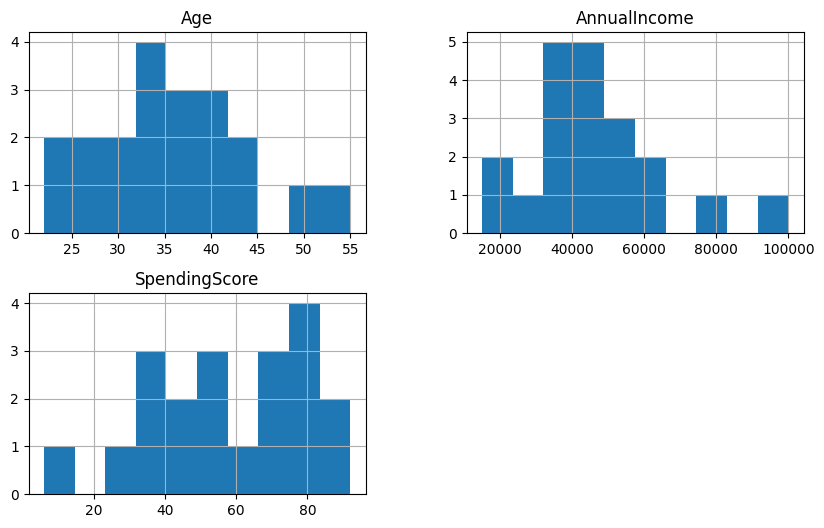

In [6]:
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.show()

**3.** **Data Normalization**

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(df_scaled.head())


        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


# **Exercise 2: Implementing K-Means Clustering**

**1. Initial Model Implementation**

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**2. Choosing Optimal k**

 - Elbow Method to determine the optimal k

In [14]:
inertia = []
k_values = range(1, 6)
for k in k_values:
 kmeans = KMeans(n_clusters=k, random_state=42)
 kmeans.fit(df_scaled)
 inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

 - **Plotting the Elbow Method**

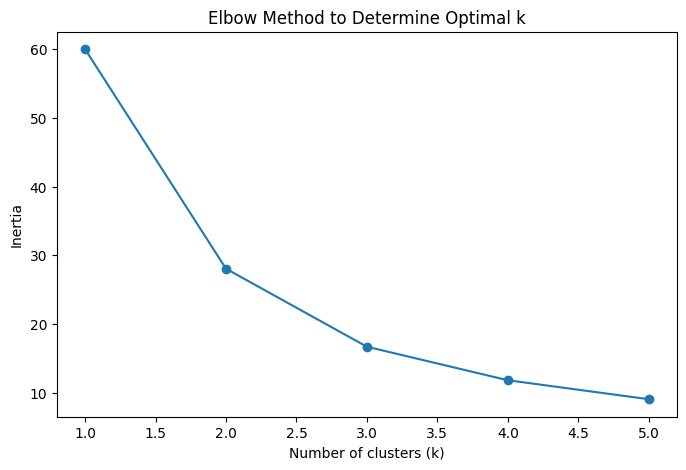

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

**3. Cluster Visualization**

 - **Visualizing the clusters**

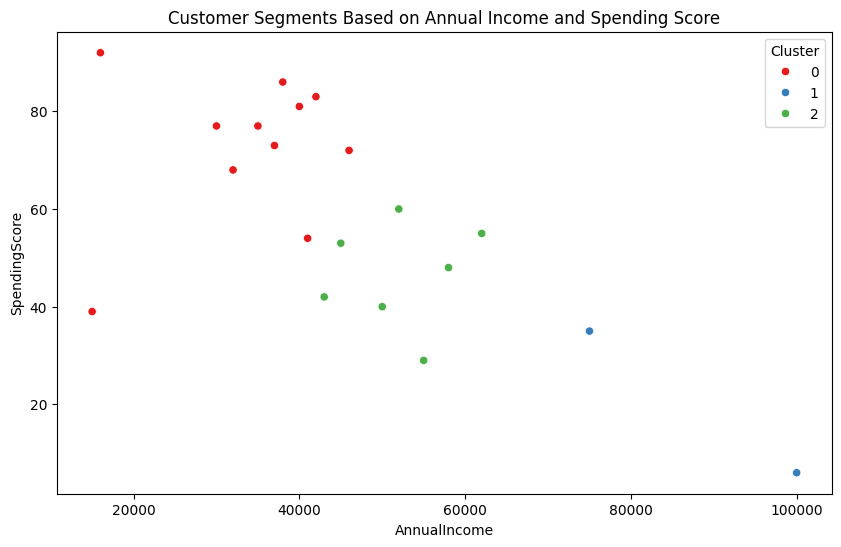

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

# **Exercise 3: Model Evaluation**

**1. Silhouette Score**

 - Calculate the silhouette score for each value of k (e.g., 2, 3, 4, 5) and determine which
value of k yields the best clustering result.


In [17]:
from sklearn.metrics import silhouette_score

for k in range(2, 6):
 kmeans = KMeans(n_clusters=k, random_state=42)
 clusters = kmeans.fit_predict(df_scaled)
 silhouette_avg = silhouette_score(df_scaled, clusters)
 print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

 **2. Cluster Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


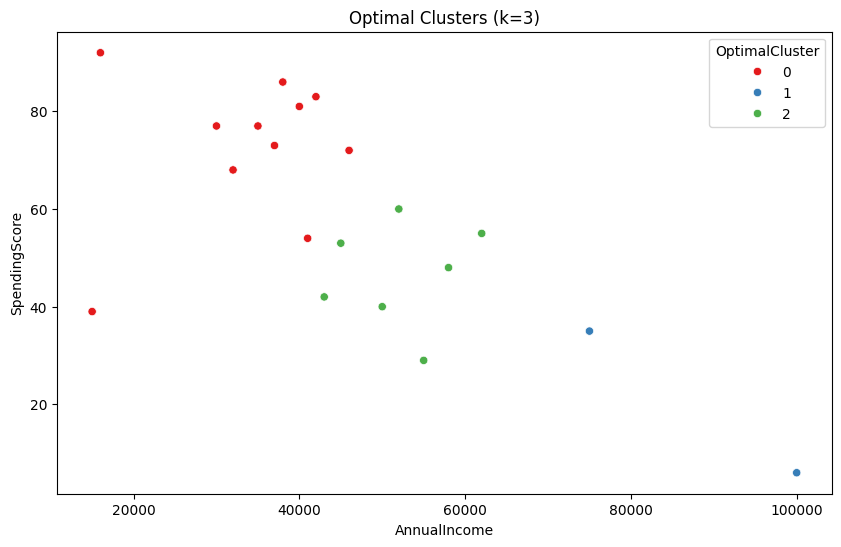

In [25]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='Set1')  # Added 'Set1' for the palette
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()


# **Exercise 4: Interpretation and Reporting**

**1. Clsuter Interpretation**



Based on the clustering analysis and the characteristics of each cluster, here's an interpretation of the three clusters identified by K-means with k=3:

- Cluster 0 (Low-Income, Moderate-Spending Group): This cluster likely represents customers with lower incomes who have a moderate spending score. These customers might be more cautious with their spending or have limited purchasing power.

- Cluster 1 (High-Income, Low-Spending Group): Customers in this cluster tend to have high incomes but low spending scores. They might represent individuals who earn a lot but prefer saving or investing rather than spending on discretionary goods.

- Cluster 2 (Moderate-Income, High-Spending Group): This cluster could represent customers with moderate income levels but high spending scores. These customers are likely more willing to spend on goods and services, possibly indulging in luxury or premium products despite their income levels.

**2. Report**

 - **Data Exploration Process**

The dataset used for clustering analysis includes columns like 'CustomerID,' 'Age,' 'AnnualIncome,' and 'SpendingScore.' The dataset was checked for missing values, and no missing data was found. Key features like 'Age,' 'AnnualIncome,' and 'SpendingScore' were explored through histograms to understand their distribution. Data normalization was applied using StandardScaler to scale these numerical features.

- **K-Means Clustering Results and Optimal Value of k**




Using the K-means algorithm, the initial number of clusters was set to 3. To find the optimal value of k, the elbow method was applied, plotting the inertia values for k ranging from 1 to 5. Based on the elbow plot and the silhouette score evaluation, k=3 was chosen as the optimal number of clusters.

Cluster Characteristics:

Cluster 0: Low-income customers with moderate spending scores.

Cluster 1: High-income customers with low spending scores.

Cluster 2: Moderate-income customers with high spending scores.

 - **Insights and Observations**

The analysis reveals that customers can be grouped based on their income and spending behavior. Interestingly, high-income customers (Cluster 1) do not necessarily have high spending scores, suggesting they may prioritize savings or have conservative spending habits. Conversely, moderate-income customers in Cluster 2 are high spenders, indicating a more lavish spending pattern despite their income levels.

**3. Vizualizations**

 - **Elbow Method Plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

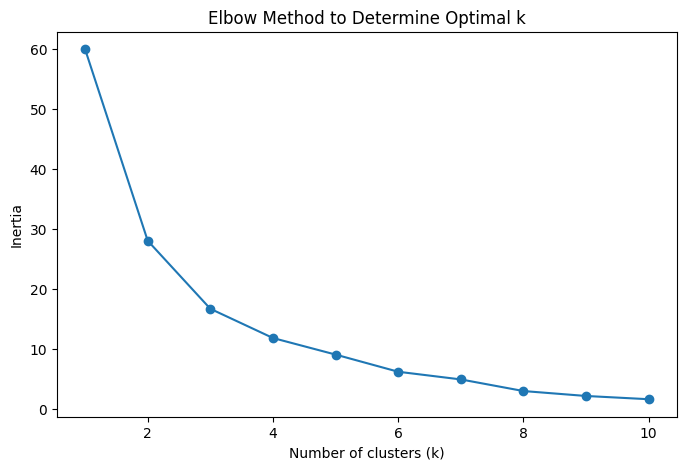

In [30]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

This plot was used to determine the optimal value of k by visualizing the inertia values for different cluster counts. A noticeable "elbow" at k=3 helped identify the optimal number of clusters.

 - **Silhouette Scores**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350
For k=6, the silhouette score is 0.331
For k=7, the silhouette score is 0.313
For k=8, the silhouette score is 0.357
For k=9, the silhouette score is 0.327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=10, the silhouette score is 0.303


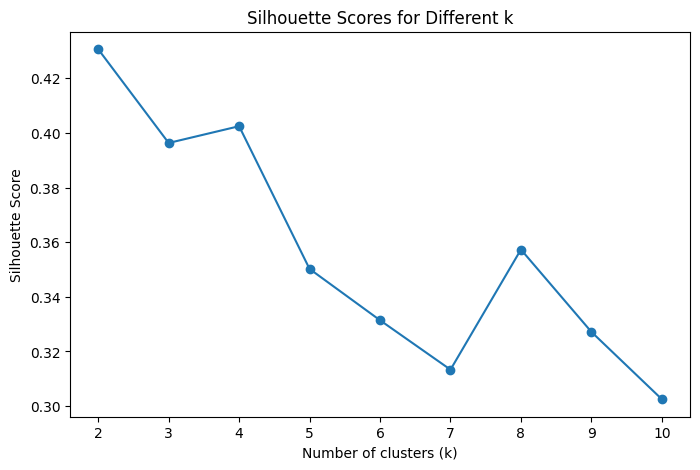

In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The silhouette score was computed for cluster values ranging from 2 to 5. The scores helped validate k=3 as the optimal choice, as it provided a balance between compactness and separation among clusters.

 - **Cluster Scatter Plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


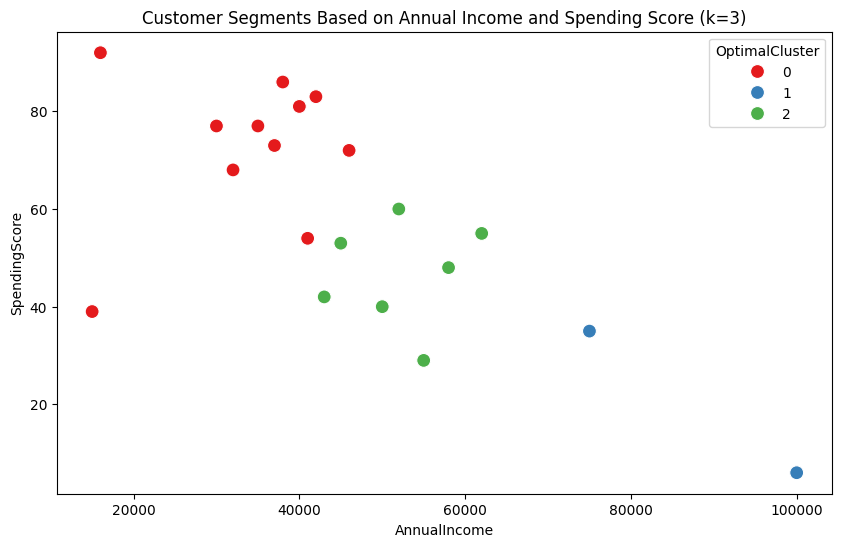

In [33]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='Set1', s=100)
plt.title(f'Customer Segments Based on Annual Income and Spending Score (k={optimal_k})')
plt.show()

A scatter plot was used to visualize customer segments based on 'AnnualIncome' and 'SpendingScore,' with clusters distinguished by color. This helped illustrate the distribution of customers across income and spending levels and how they fall into distinct groups.